In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, OneHotEncoder, PolynomialFeatures, SplineTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.feature_selection import SelectKBest, RFECV, SelectFromModel
from sklearn.feature_selection import f_classif, f_regression
from sklearn.decomposition import PCA
from sklearn.compose import TransformedTargetRegressor

In [5]:
train_df = pd.read_csv('data/Life_train.csv')
test_df = pd.read_csv('data/Life_test.csv')

target = 'Life expectancy '  
train_df = train_df.rename(columns={target: 'target'})
test_df = test_df.rename(columns={target: 'target'})

In [6]:
train_df

,Year,target,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
1,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
3,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
4,2010,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,2005,44.6,717.0,28,4.14,8.717409,65.0,420,27.5,43,69.0,6.44,68.0,30.3,444.765750,129432.0,9.0,9.0,0.406,9.3
2485,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2486,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2487,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0


<Axes: >

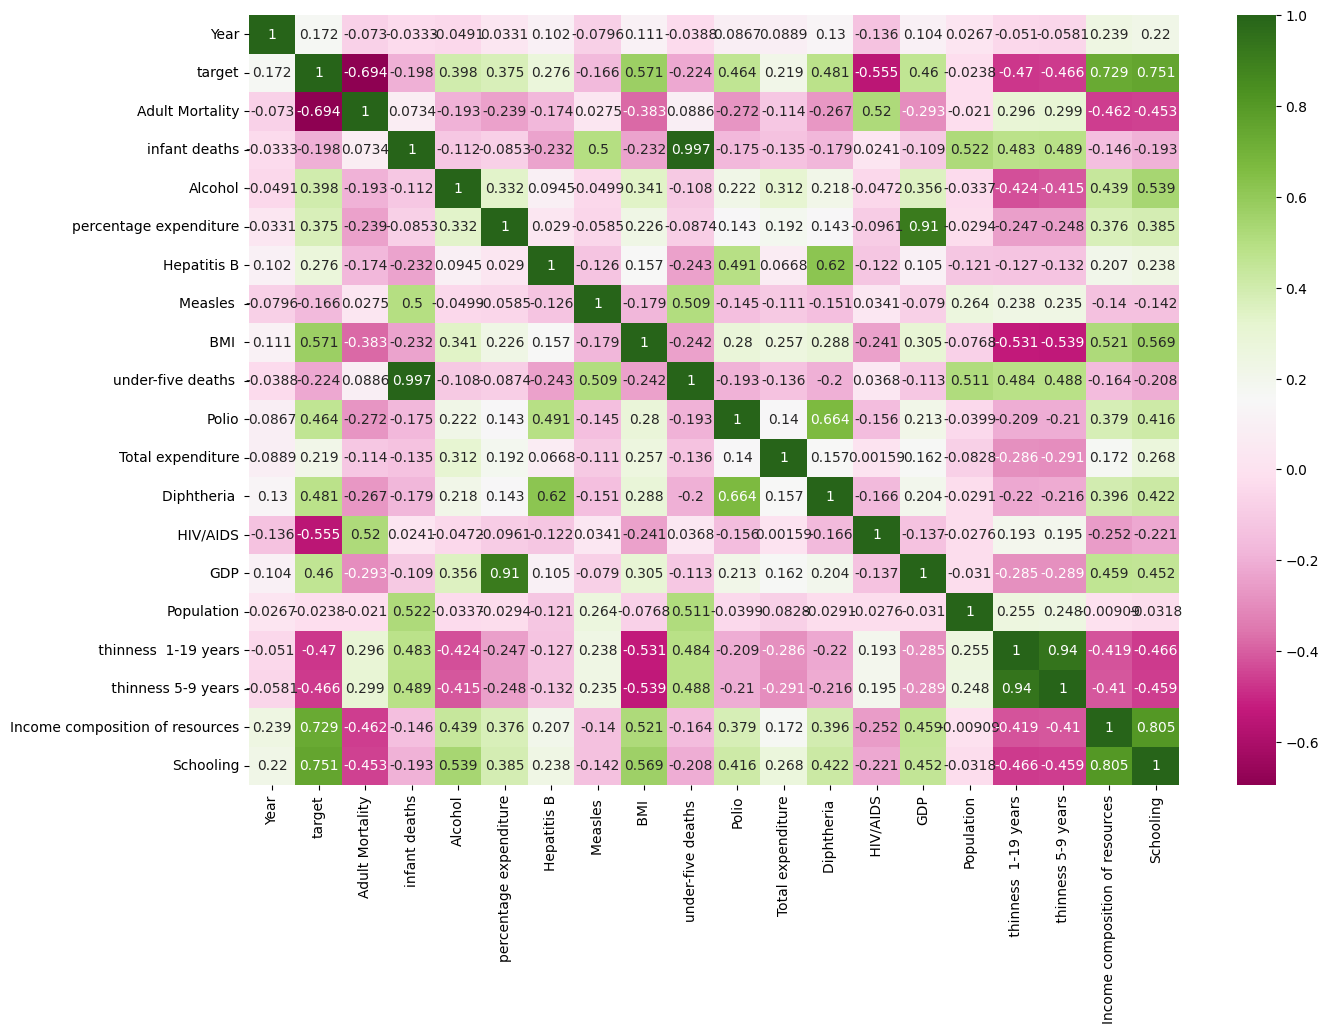

In [7]:
plt.figure(figsize=(15, 10))
sns.heatmap(train_df.corr(), cmap="PiYG", annot=True, fmt='.3g')

In [8]:
to_drop = ['GDP', 'infant deaths', 'Schooling']

In [9]:
train_df.isna().sum(0)

Year                                 0
target                               0
Adult Mortality                      0
infant deaths                        0
Alcohol                            167
percentage expenditure               0
Hepatitis B                        480
Measles                              0
 BMI                                28
under-five deaths                    0
Polio                               18
Total expenditure                  196
Diphtheria                          18
 HIV/AIDS                            0
GDP                                386
Population                         554
 thinness  1-19 years               28
 thinness 5-9 years                 28
Income composition of resources    146
Schooling                          146
dtype: int64

In [10]:
train_df.nunique()

Year                                 16
target                              358
Adult Mortality                     413
infant deaths                       196
Alcohol                             996
percentage expenditure             1967
Hepatitis B                          85
Measles                             841
 BMI                                586
under-five deaths                   242
Polio                                73
Total expenditure                   787
Diphtheria                           81
 HIV/AIDS                           188
GDP                                2103
Population                         1932
 thinness  1-19 years               197
 thinness 5-9 years                 199
Income composition of resources     612
Schooling                           172
dtype: int64

In [11]:
pd.concat([train_df,test_df]).nunique() - train_df.nunique()

Year                                 0
target                               0
Adult Mortality                     12
infant deaths                       13
Alcohol                             80
percentage expenditure             356
Hepatitis B                          2
Measles                            117
 BMI                                16
under-five deaths                   10
Polio                                0
Total expenditure                   29
Diphtheria                           0
 HIV/AIDS                           12
GDP                                382
Population                         345
 thinness  1-19 years                3
 thinness 5-9 years                  8
Income composition of resources     13
Schooling                            1
dtype: int64

In [12]:
class ColumnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self 

In [13]:
cat_cols = ['Year']
num_cols = [column for column in train_df.columns if column not in ['Year', 'target']]

cat_steps = [
    ('onehot', OneHotEncoder(handle_unknown='ignore',))
]
num_steps = [
    # ('dropper', ColumnDropperTransformer(to_drop)),
    ('scaler1', StandardScaler()),
    ('pwr', PowerTransformer()),
    ('imputer', KNNImputer(n_neighbors=6)),
    ('poly', PolynomialFeatures(2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('f_select', SelectKBest(f_classif, k=40)),
    
]

cat_transformer = Pipeline(cat_steps)
num_transformer = Pipeline(num_steps)
preprocessor = ColumnTransformer(
    [
        ('num',  num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)



model = LinearRegression()
log_model = TransformedTargetRegressor(model, transformer=MinMaxScaler())

pipe = Pipeline([
    ('prep', preprocessor),
    ('model', model)
])

In [14]:
X = train_df.drop('target', axis=1)
y = train_df['target']

In [15]:
cv_oupt = cross_validate(pipe, X, y, cv=20, scoring='neg_mean_squared_error', return_estimator=True)
scores = cv_oupt['test_score']
models = cv_oupt['estimator']

In [16]:
scores.mean(), scores.std() 

(-7.55038576132989, 2.4381009470227695)

In [ ]:
preds = []
for model in models:
    pred = model.predict(test_df)
    preds.append(pred)

In [ ]:
preds = np.array(preds)

In [ ]:
subm_preds = preds.mean(0)

In [ ]:
subm_df = pd.DataFrame({'index': range(len(subm_preds)), 'Life expectancy': subm_preds})

In [ ]:
subm_df

,index,Life expectancy
0,0,76.271768
1,1,75.419430
2,2,73.358117
3,3,55.681936
4,4,69.155029
...,...,...
434,434,63.644952
435,435,72.723583
436,436,75.855191
437,437,82.232730


In [ ]:
subm_df.to_csv('subm.csv', index=False)

In [ ]:
subm_df = pd.read_csv('subm.csv')

In [ ]:
subm_df['Life expectancy'] = subm_df['Life expectancy'].round(1)

In [ ]:
subm_df.to_csv('subm.csv', index=False)